<a href="https://colab.research.google.com/github/dribnet/clipit/blob/remix/demos/animations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pixray Animations

This version of the notebook is setup show off animations based on a series of init_images and/or overlay_images.

In [1]:
#@title Setup

#@markdown Please execute this cell by pressing the _Play_ button 
#@markdown on the left. You should only need to run this part once.

#@markdown **Note**: This installs the software on the Colab 
#@markdown notebook in the cloud and not on your computer.

%%capture
!git clone https://github.com/openai/CLIP
# !pip install taming-transformers
!git clone https://github.com/CompVis/taming-transformers.git
!rm -Rf pixray
!git clone --branch remix https://github.com/dribnet/pixray
!pip install ftfy regex tqdm omegaconf pytorch-lightning
!pip install kornia
!pip install imageio-ffmpeg   
!pip install einops
!pip install torch-optimizer
!pip install easydict
!pip install braceexpand
!pip install git+https://github.com/pvigier/perlin-numpy
!mkdir steps
!mkdir models
!rm -rf shoetable.zip shoetable
!wget https://github.com/dribnet/clipit/files/7256353/shoetable.zip -O shoetable.zip
!unzip -o shoetable.zip

import sys
sys.path.append("pixray")

In [2]:
#@title Easy Settings

#@markdown Let's take a prompt and try drawing with a number
#@markdown of different models. The models we will be using are
#@markdown VQGAN models which mainly differ on the trained data
#@markdown and architecture. Swapping the model will make the result
#@markdown look differnt. For example: "wikiart" is trained on
#@markdown artwork and so draws things more arty. ¯\\_(ツ)_/¯

#@markdown Best bet: just try different models out and see what happens.

prompts = "stiletto made of leopard skin" #@param {type:"string"}

vqgan_model = "imagenet_f16_16384" #@param ["imagenet_f16_16384", "imagenet_f16_1024", "openimages_f16_8192", "wikiart_1024", "wikiart_16384", "coco"]

quality = "better" #@param ["draft", "normal", "better", "best"]

aspect = "square" #@param ["widescreen", "square"]

#@markdown When you have the settings you want, press the play button on the left.
#@markdown The system will save these and we can then run it below.

# Simple setup from menu choices
import pixray
pixray.reset_settings()
pixray.add_settings(prompts=prompts, vqgan_model=vqgan_model)
pixray.add_settings(aspect=aspect)
# pixray.add_settings(display_clear=True)

pixray/util.py:40: DeprecationWarning: invalid escape sequence \[
  s2 = re.sub('[(\[\])]', '', s)


## Sneak in some more settings? (optional)

The code block below is a chance to sneak in some last settings before we start the code. For example, you can set the quality to "better" or the aspect to "square". In the other notebooks if you want to sneak in a different vqgan model before drawing, you can do it here by requesting a different vqgan_model settings. This allows us to mix and match the best settings discussed in differnt notebooks.

Make sure you click the play button below *after* running the easy settings above if you want to make any of these modifications before running.

In [5]:
# ANIMATIONS need a bunch of "init_images". The * (star) loads all matching files
# in this case these 24 images will be the 24 frames of animation
pixray.add_settings(init_image="shoetable/frame*.png")

# this number from 0 to 255 controls how "solid" (opaque) the frames start out at
pixray.add_settings(init_image_alpha=240)

# this number from 0 to 255 controls how closely a frame matches the one after it
pixray.add_settings(animation_alpha=224)

# this is the folder where the animation gets saved (will be created)
pixray.add_settings(animation_dir="shoe1")

# for animations this controls how often the images are re-merged into the animation
pixray.add_settings(save_every=5)

# we can also review the animation itself from time to time
pixray.add_settings(display_every=10)

# animations will tend to drift, best to stop after a few dozen iterations
pixray.add_settings(iterations=30)


# examples below start with '#" are comments and do not get run
# pixray.add_settings(overlay_image="file.png")
# pixray.add_settings(image_prompts="file.png")
# pixray.add_settings(overlay_every=20)
# pixray.add_settings(seed=42)
# pixray.add_settings(display_every=10)
# pixray.add_settings(iterations=200)
# pixray.add_settings(size=[256, 256])
# pixray.add_settings(vector_prompts="textoff")

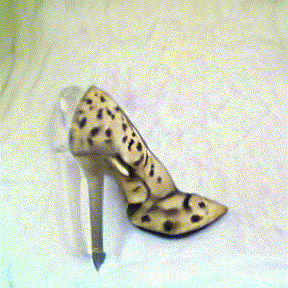

anim: 23/24 iter: 20, loss: 1.49, losses: 0.752, 0.742
Dropping learning rate
anim: 0/24 iter: 25, loss: 1.5, losses: 0.756, 0.749
anim: 1/24 iter: 25, loss: 1.46, losses: 0.736, 0.72
anim: 2/24 iter: 25, loss: 1.46, losses: 0.732, 0.728
anim: 3/24 iter: 25, loss: 1.39, losses: 0.696, 0.699
anim: 4/24 iter: 25, loss: 1.43, losses: 0.726, 0.708
anim: 5/24 iter: 25, loss: 1.45, losses: 0.73, 0.725
anim: 6/24 iter: 25, loss: 1.37, losses: 0.69, 0.684
anim: 7/24 iter: 25, loss: 1.45, losses: 0.725, 0.722
anim: 8/24 iter: 25, loss: 1.45, losses: 0.724, 0.725
anim: 9/24 iter: 25, loss: 1.47, losses: 0.73, 0.743
anim: 10/24 iter: 25, loss: 1.55, losses: 0.772, 0.776
anim: 11/24 iter: 25, loss: 1.49, losses: 0.742, 0.749
anim: 12/24 iter: 25, loss: 1.48, losses: 0.736, 0.742
anim: 13/24 iter: 25, loss: 1.43, losses: 0.718, 0.711
anim: 14/24 iter: 25, loss: 1.49, losses: 0.744, 0.75
anim: 15/24 iter: 25, loss: 1.43, losses: 0.709, 0.719
anim: 16/24 iter: 25, loss: 1.4, losses: 0.7, 0.7
anim: 17

In [6]:
#@title Now Run

#@markdown Now we'll apply all settings and run.
#@markdown 
#@markdown Click the play button to the left to get this running.
#@markdown 
#@markdown When this is done, you can go above and change the
#@markdown model in the settings and see if you get different results.
#@markdown Note that the first time you run any model it takes a bit
#@markdown longer because the model has to download when needed.

settings = pixray.apply_settings()
pixray.do_init(settings)
pixray.do_run(settings)
